## Observations and Insights 

From the summary results, we see that the four drug regimens with the lowest standard error for average tumor size are Capomulin, Ceftamin, Ramicane, and Infubinol.
Since these results have the lowest standard error, the tests are more promising to be pointing towards their actual effectiveness, so we analyze these further.

Looking at the boxplots describing the final tumor volume for our picked 4 drug regimens, 
we can see that the Capomulin and Ramicane regimens resulted in smaller tumors at the final timepoint. The plots show that both of these drugs have an average final tumor size under 40 mm3, with a maximum final tumor size under 50 mm3, while the other two regimens have an average above 50, and a maximum above 70.

Finally, going back to the summary results, we see that the Ramicane regimen had an overall lower mean tumor size, as well as a lower variance and standard deviation in its results, so it looks to be the most promising treatment.

The only potential drawback is that both Capomulin and Ramicane regimens have greater number of measurements. One possible reason is that these trials lasted longer (which could be from just a timing standpoint of the trial; or some other underlying cause such as they have fewer side effects that would halt treatment, which is also a plus!), and thus were able to have a greater effect. This would definitely be skewing the data in their favor.  Another possible reason is that more measurements were just taken during the trial (so all trials lasted the same amount of time), and this wouldn't have a great effect on skewing the summary data in their favor; it just would make their SEM lower since there are more datapoints.




In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
big_df = mouse_metadata.merge(study_results,how='outer',on='Mouse ID')
# Display the data table for preview
big_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(big_df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = study_results.duplicated()

#seeing how many duplicates there are to determine how best proceed
duplicates.value_counts()


False    1892
True        1
dtype: int64

In [4]:
#since there is only one duplicate, finding that ID is pretty straightforward
duplicated_index=duplicates.loc[duplicates==True].index
duplicate_mouse_id=study_results.iloc[137,0]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

list_of_dupe = big_df.loc[big_df['Mouse ID']=='g989'].index.tolist()
big_df.loc[list_of_dupe,:]
#here is all the data with the mouse id that was duplicated.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

big_df = big_df.drop_duplicates(subset={'Mouse ID','Timepoint'},keep='first')

#make sure it's clean
big_df.iloc[908:920,:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2
921,h246,Ketapril,Male,13,30,0,45.000000,0
922,h246,Ketapril,Male,13,30,5,49.470417,0


In [7]:
# Checking the number of mice in the clean DataFrame.
len(big_df['Mouse ID'].unique())

#this number is the same because we called unique both times; which would have ignored the duplicate anyways

249

## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_groups = big_df.groupby('Drug Regimen')
mean = regimen_groups['Tumor Volume (mm3)'].mean()

median = regimen_groups['Tumor Volume (mm3)'].median()
variance = regimen_groups['Tumor Volume (mm3)'].var()
std = regimen_groups['Tumor Volume (mm3)'].std()
sem = regimen_groups['Tumor Volume (mm3)'].sem()
summary = pd.DataFrame({'Mean':mean,'Median':median,'Variance':variance,'Standard Deviation':std,'SEM':sem})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = regimen_groups['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_agg.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mesurements')

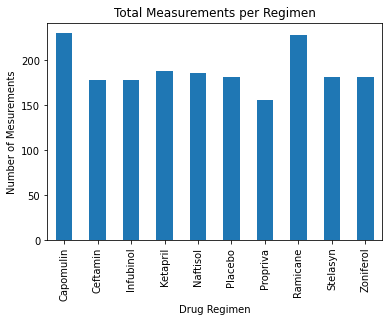

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

count_df = pd.DataFrame(regimen_groups['Mouse ID'].count())
count_df = count_df.reset_index()
count_df = count_df.rename(columns={'Mouse ID':'Number of Measurements'})
count_df.plot(kind='bar',x='Drug Regimen',y='Number of Measurements',legend=False,title='Total Measurements per Regimen')
plt.ylabel('Number of Mesurements')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

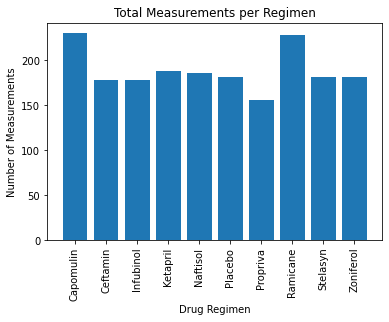

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(count_df['Drug Regimen'],count_df['Number of Measurements'])
plt.title('Total Measurements per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.xticks(rotation=90)

Text(0, 0.5, '')

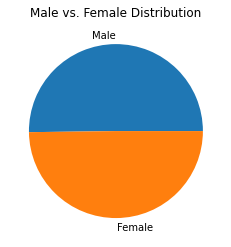

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = pd.DataFrame(mouse_metadata['Sex'].value_counts())

gender_dist.plot(kind='pie',y='Sex',legend=False,title="Male vs. Female Distribution")
plt.ylabel('')

Text(0.5, 1.0, 'Male vs. Female Distribution')

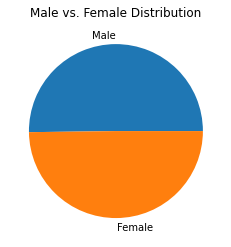

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_dist2 = gender_dist.reset_index()
gender_dist2 = gender_dist2.rename(columns={'index':'Sex','Sex':'Number'})
plt.pie(gender_dist2['Number'],labels=gender_dist2['Sex'])
plt.title('Male vs. Female Distribution')


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap = regimen_groups.get_group('Capomulin')
ram = regimen_groups.get_group('Ramicane')
inf = regimen_groups.get_group('Infubinol')
cef = regimen_groups.get_group('Ceftamin')
# Start by getting the last (greatest) timepoint for each mouse
cap_final = cap.drop_duplicates(subset={'Mouse ID'},keep='last')
ram_final = ram.drop_duplicates(subset={'Mouse ID'},keep='last')
inf_final = inf.drop_duplicates(subset={'Mouse ID'},keep='last')
cef_final = cef.drop_duplicates(subset={'Mouse ID'},keep='last')


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
chosen_four = cap_final.merge(ram_final,how='outer')
chosen_four = chosen_four.merge(inf_final,how='outer')
chosen_four = chosen_four.merge(cef_final,how='outer')
chosen_four_final = chosen_four[['Mouse ID','Drug Regimen', 'Weight (g)','Tumor Volume (mm3)']]
chosen_four_final.rename(columns={'Tumor Volume (mm3)':'Final Tumor Volume (mm3)'})

,Mouse ID,Drug Regimen,Weight (g),Final Tumor Volume (mm3)
0,s185,Capomulin,17,23.343598
1,x401,Capomulin,15,28.484033
2,m601,Capomulin,17,28.430964
3,f966,Capomulin,17,30.485985
4,u364,Capomulin,17,31.023923
...,...,...,...,...
95,x226,Ceftamin,28,45.000000
96,x581,Ceftamin,28,64.634949
97,x822,Ceftamin,29,61.386660
98,y769,Ceftamin,27,68.594745


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    # Locate the rows which contain mice on each drug and get the tumor volumes  
    # add subset    
    # Determine outliers using upper and lower bounds


#for the capomulin regimen   
vol_cap = cap_final['Tumor Volume (mm3)']
quartiles_cap = vol_cap.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap

lowerbound_cap = lowerq_cap - (1.5*iqr_cap)
upperbound_cap = upperq_cap + (1.5*iqr_cap)
outliers_cap = cap_final.loc[(cap_final['Tumor Volume (mm3)']<lowerbound_cap) | (cap_final['Tumor Volume (mm3)']>upperbound_cap)]


#ramicane
vol_ram = ram_final['Tumor Volume (mm3)']
quartiles_ram = vol_ram.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

lowerbound_ram = lowerq_ram - (1.5*iqr_ram)
upperbound_ram = upperq_ram + (1.5*iqr_ram)
outliers_ram = ram_final.loc[(ram_final['Tumor Volume (mm3)']<lowerbound_ram) | (ram_final['Tumor Volume (mm3)']>upperbound_ram)]


#infubinol
vol_inf = inf_final['Tumor Volume (mm3)']
quartiles_inf = vol_inf.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

lowerbound_inf = lowerq_inf - (1.5*iqr_inf)
upperbound_inf = upperq_inf + (1.5*iqr_inf)
outliers_inf = inf_final.loc[(inf_final['Tumor Volume (mm3)']<lowerbound_inf) | (inf_final['Tumor Volume (mm3)']>upperbound_inf)]


#ceftamin
vol_cef = cef_final['Tumor Volume (mm3)']
quartiles_cef = vol_cef.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef

lowerbound_cef = lowerq_cef - (1.5*iqr_cef)
upperbound_cef = upperq_cef + (1.5*iqr_cef)
outliers_cef = cef_final.loc[(cef_final['Tumor Volume (mm3)']<lowerbound_cef) | (cef_final['Tumor Volume (mm3)']>upperbound_cef)]


    

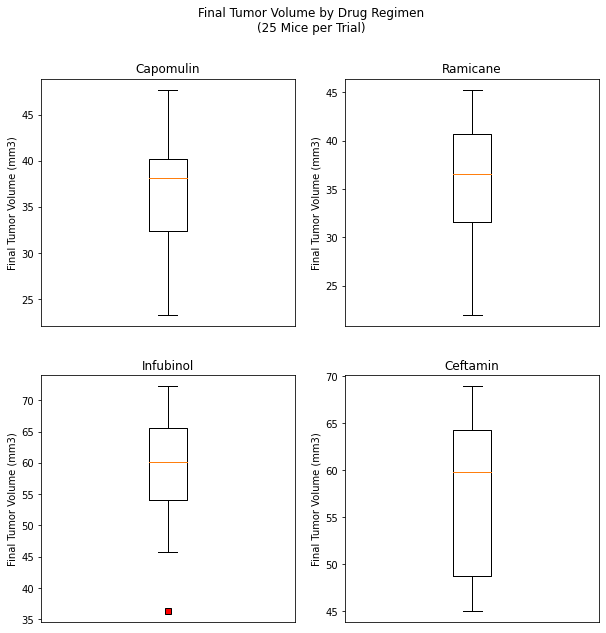

In [44]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1 , axs = plt.subplots(2,2,figsize=(10,10))
red_square = dict(markerfacecolor='r', marker='s')

axs[0,0].boxplot(vol_cap,flierprops=red_square)
axs[0,0].set_title('Capomulin')
axs[0,0].set_xticks([])
axs[0,0].set_ylabel('Final Tumor Volume (mm3)')

axs[0,1].boxplot(vol_ram,flierprops=red_square)
axs[0,1].set_title('Ramicane')
axs[0,1].set_xticks([])
axs[0,1].set_ylabel('Final Tumor Volume (mm3)')

axs[1,0].boxplot(vol_inf,flierprops=red_square)
axs[1,0].set_title('Infubinol')
axs[1,0].set_xticks([])
axs[1,0].set_ylabel('Final Tumor Volume (mm3)')

axs[1,1].boxplot(vol_cef,flierprops=red_square)
axs[1,1].set_title('Ceftamin')
axs[1,1].set_xticks([])
axs[1,1].set_ylabel('Final Tumor Volume (mm3)')

fig1.suptitle('Final Tumor Volume by Drug Regimen\n(25 Mice per Trial)')
#fig1.tight_layout()
plt.show()

## Line and Scatter Plots

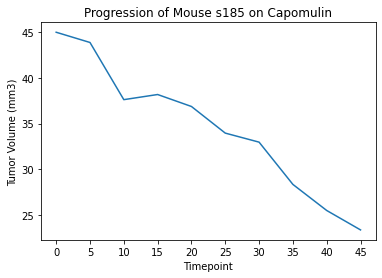

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = 's185'
just_one_cap = cap.loc[cap['Mouse ID']==mouse_id]
plt.plot(just_one_cap['Timepoint'],just_one_cap['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks(ticks=just_one_cap['Timepoint'],labels=just_one_cap['Timepoint'])
plt.title(f'Progression of Mouse {mouse_id} on Capomulin')
plt.show()

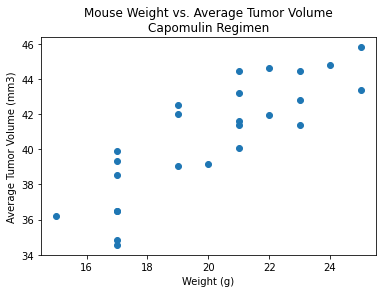

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_mouse_groups = cap.groupby('Mouse ID')
cap_average_tumor = cap_mouse_groups['Tumor Volume (mm3)'].mean()
cap_weight = cap_mouse_groups['Weight (g)'].mean()
plt.scatter(cap_weight,cap_average_tumor)
plt.title('Mouse Weight vs. Average Tumor Volume\nCapomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The r-squared value is: 0.7088568047708717


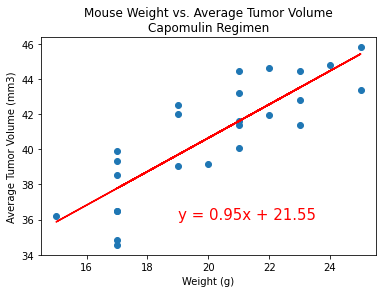

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_weight,cap_average_tumor)
regress_values = cap_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(cap_weight,cap_average_tumor)
plt.plot(cap_weight,regress_values,"r-")
plt.annotate(line_eq,(19,36),fontsize=15,color='red')
plt.title('Mouse Weight vs. Average Tumor Volume\nCapomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The r-squared value is: {rvalue**2}')
plt.show()